<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB3/blob/main/6351071072_LAB3_Bai2_Trang5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- CELL 1: KHAI BÁO THƯ VIỆN ---
print("Nguyễn Đức Trung - 6351071072")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

Nguyễn Đức Trung - 6351071072


In [2]:
# --- CELL 2: CÂU A (Đọc dữ liệu MNIST) ---
print("Nguyễn Đức Trung - 6351071072")

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Đã load dữ liệu MNIST thành công.")

Nguyễn Đức Trung - 6351071072
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Đã load dữ liệu MNIST thành công.


In [3]:
# --- CELL 3: CÂU B (In kích thước) ---
print("Nguyễn Đức Trung - 6351071072")

print(f"Kích thước tập train gốc (train_images): {train_images.shape}")
print(f"Kích thước nhãn train (train_labels)   : {train_labels.shape}")
print(f"Kích thước tập test (test_images)      : {test_images.shape}")
print(f"Kích thước nhãn test (test_labels)     : {test_labels.shape}")

Nguyễn Đức Trung - 6351071072
Kích thước tập train gốc (train_images): (60000, 28, 28)
Kích thước nhãn train (train_labels)   : (60000,)
Kích thước tập test (test_images)      : (10000, 28, 28)
Kích thước nhãn test (test_labels)     : (10000,)


In [5]:
# --- CELL 4: CÂU C (Chuẩn hóa về [0,1]) ---
print("Nguyễn Đức Trung - 6351071072")

train_images = train_images / 255.0
test_images = test_images / 255.0


Nguyễn Đức Trung - 6351071072


In [6]:
# --- CELL 5: CÂU D (Chia Train/Validation tỷ lệ 8:2) ---
print("Nguyễn Đức Trung - 6351071072")

train_images, validation_images, train_labels, validation_labels = train_test_split(
    train_images,
    train_labels,
    test_size=0.2,
    random_state=42
)

print(f"Shape tập Train mới      : {train_images.shape}")
print(f"Shape tập Validation     : {validation_images.shape}")

Nguyễn Đức Trung - 6351071072
Shape tập Train mới      : (48000, 28, 28)
Shape tập Validation     : (12000, 28, 28)


In [7]:
# --- CELL 6: CÂU E (Xây dựng kiến trúc Model) ---
print("Nguyễn Đức Trung - 6351071072")

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.summary()

Nguyễn Đức Trung - 6351071072


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# --- CELL 7: CÂU F (Biên dịch Model) ---
print("Nguyễn Đức Trung - 6351071072")

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Đã biên dịch mô hình thành công.")

Nguyễn Đức Trung - 6351071072
Đã biên dịch mô hình thành công.


In [9]:
# --- CELL 8: CÂU G (Huấn luyện Model) ---
print("Nguyễn Đức Trung - 6351071072")

print("Bắt đầu huấn luyện...")
history = model.fit(train_images,
                    train_labels,
                    epochs=5,
                    batch_size=32,
                    validation_data=(validation_images, validation_labels))
print("Huấn luyện hoàn tất.")

Nguyễn Đức Trung - 6351071072
Bắt đầu huấn luyện...
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5048 - loss: 1.8098 - val_accuracy: 0.8198 - val_loss: 0.7281
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8203 - loss: 0.6732 - val_accuracy: 0.8752 - val_loss: 0.4784
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8596 - loss: 0.4937 - val_accuracy: 0.8946 - val_loss: 0.3940
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8825 - loss: 0.4146 - val_accuracy: 0.9053 - val_loss: 0.3505
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8908 - loss: 0.3773 - val_accuracy: 0.9112 - val_loss: 0.3257
Huấn luyện hoàn tất.


Nguyễn Đức Trung - 6351071072


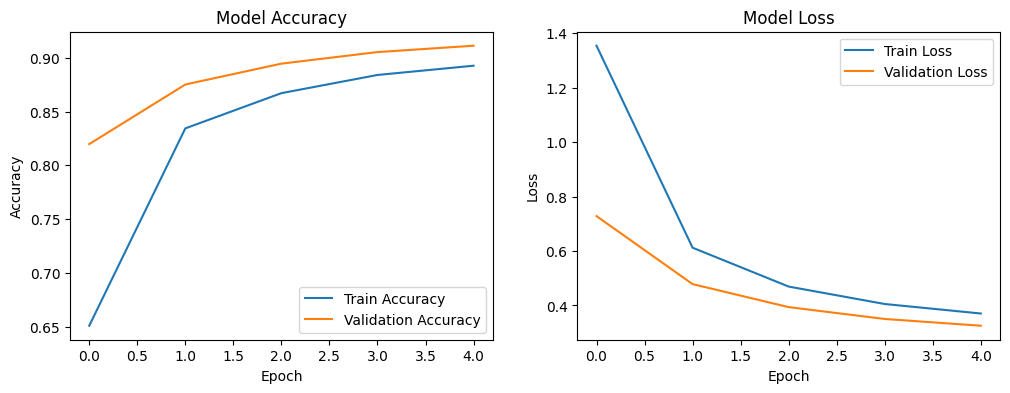

In [10]:
# --- CELL 9: CÂU H (Vẽ biểu đồ Accuracy và Loss) ---
print("Nguyễn Đức Trung - 6351071072")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
# --- CELL 10: CÂU I (Dự đoán tập Test) ---
print("Nguyễn Đức Trung - 6351071072")

y_pred_probs = model.predict(test_images)

y_pred_classes = np.argmax(y_pred_probs, axis=1)

print("Đã dự đoán xong trên tập Test.")
print(f"5 kết quả dự đoán đầu tiên: {y_pred_classes[:5]}")

Nguyễn Đức Trung - 6351071072
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step
Đã dự đoán xong trên tập Test.
5 kết quả dự đoán đầu tiên: [7 2 1 0 4]


In [13]:
# --- CELL 11: CÂU J (Tính Accuracy) ---
print("Nguyễn Đức Trung - 6351071072")

test_acc = accuracy_score(test_labels, y_pred_classes)
print(f"Accuracy trên tập Test: {test_acc:.4f} (hay {test_acc*100:.2f}%)")

Nguyễn Đức Trung - 6351071072
Accuracy trên tập Test: 0.9112 (hay 91.12%)


In [14]:
# --- CELL 12: CÂU K (Classification Report) ---
print("Nguyễn Đức Trung - 6351071072")

print("Báo cáo phân loại chi tiết:")
target_names = [str(i) for i in range(10)] # Tên các lớp từ "0" đến "9"
print(classification_report(test_labels, y_pred_classes, target_names=target_names))

Nguyễn Đức Trung - 6351071072
Báo cáo phân loại chi tiết:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.92      0.87      0.90      1032
           3       0.91      0.87      0.89      1010
           4       0.91      0.92      0.92       982
           5       0.87      0.85      0.86       892
           6       0.93      0.94      0.93       958
           7       0.92      0.91      0.92      1028
           8       0.84      0.89      0.86       974
           9       0.90      0.90      0.90      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Nguyễn Đức Trung - 6351071072


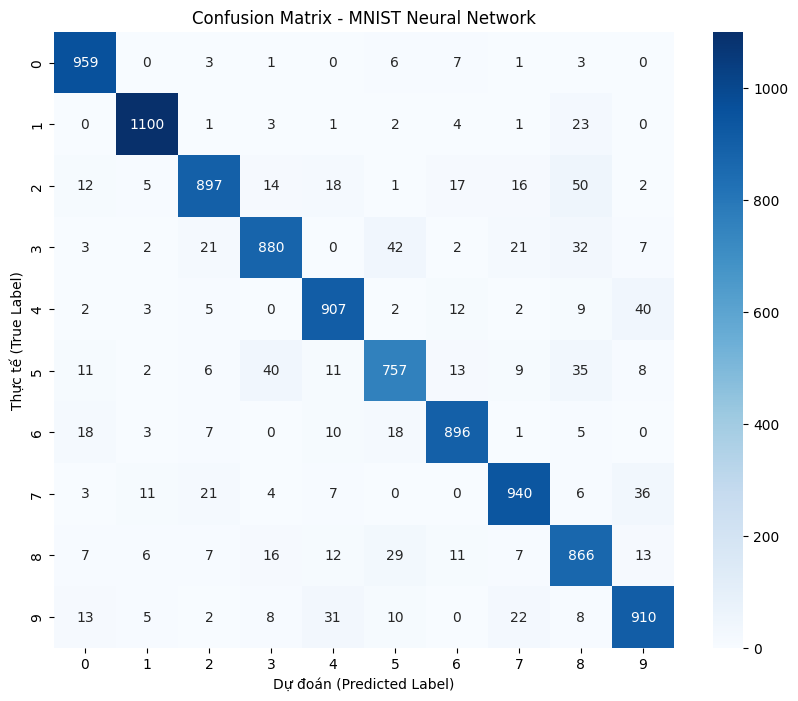

In [15]:
# --- CELL 13: CÂU L (Confusion Matrix Heatmap) ---
print("Nguyễn Đức Trung - 6351071072")

cm = confusion_matrix(test_labels, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix - MNIST Neural Network')
plt.ylabel('Thực tế (True Label)')
plt.xlabel('Dự đoán (Predicted Label)')
plt.show()

Nguyễn Đức Trung - 6351071072


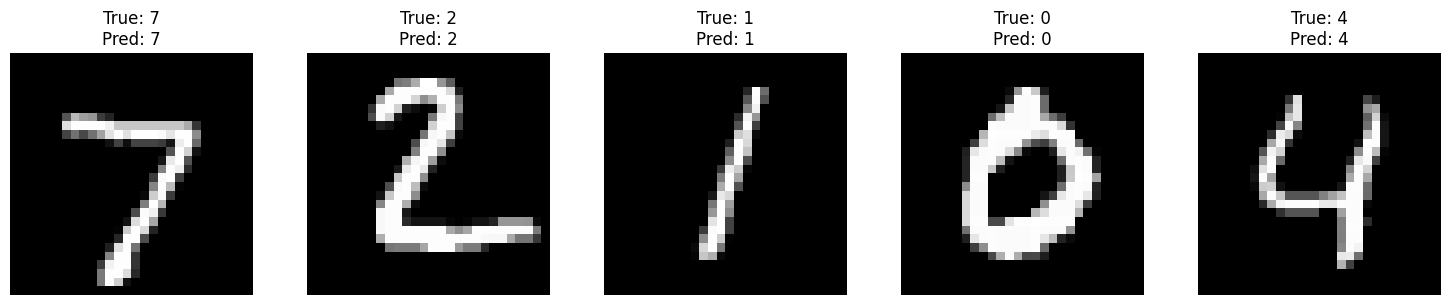

In [16]:
# --- CELL 14: CÂU M (5 ảnh đầu tiên trong tập Test) ---
print("Nguyễn Đức Trung - 6351071072")

plt.figure(figsize=(15, 3))

for i in range(5):
    img = test_images[i]

    img_input = np.expand_dims(img, axis=0)
    prediction_prob = model.predict(img_input, verbose=0)
    prediction_label = np.argmax(prediction_prob)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {test_labels[i]}\nPred: {prediction_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Nguyễn Đức Trung - 6351071072
Tổng số mẫu sai: 888
Hiển thị 5 mẫu sai đầu tiên:


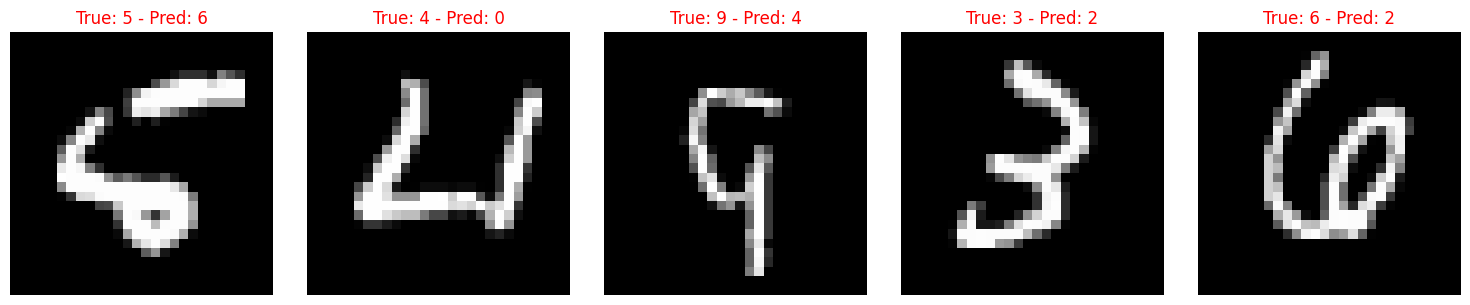

In [17]:
# --- CELL 15: CÂU N (5 ảnh phân lớp SAI đầu tiên) ---
print("Nguyễn Đức Trung - 6351071072")

misclassified_indices = np.where(y_pred_classes != test_labels)[0]

print(f"Tổng số mẫu sai: {len(misclassified_indices)}")
print("Hiển thị 5 mẫu sai đầu tiên:")

plt.figure(figsize=(15, 3))

for i, idx in enumerate(misclassified_indices[:5]):
    img = test_images[idx]
    true_label = test_labels[idx]
    pred_label = y_pred_classes[idx]

    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label} - Pred: {pred_label}", color='red')
    plt.axis('off')

plt.tight_layout()
plt.show()